### Evaluation Metrics

In [1]:
import numpy as np
from sklearn import metrics

In [2]:
y_pred = [ 0, 1, 0, 0 ]

In [3]:
y_true = [ 0, 1, 0, 1 ]

In [4]:
#Precision score: TP/TP+FP
metrics.precision_score(y_true, y_pred)

1.0

In [5]:
#Recall score: TP/TP+FN
metrics.recall_score(y_true, y_pred)

0.5

In [7]:
#f1
metrics.f1_score(y_true, y_pred)

0.6666666666666666

In [8]:
metrics.accuracy_score(y_true, y_pred)

0.75

In [9]:
1 - metrics.accuracy_score(y_true, y_pred)

0.25

### Confusion Matrix

In [11]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [12]:
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [13]:
clf = svm.SVC(kernel = 'linear')

In [14]:
X, y = iris.data, iris.target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [16]:
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


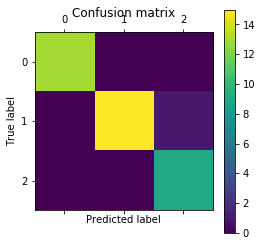

In [18]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
scores = cross_val_score(clf, iris.data, iris.target,
                        scoring = 'accuracy', cv = 5)

In [21]:
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [22]:
scores.mean()

0.9800000000000001

In [23]:
#재현율, 정확도의 조화평군 
scores = cross_val_score(clf, iris.data, iris.target,
                        scoring = 'f1_macro', cv = 5)

In [24]:
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Pipeline & cross validation score and predict

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [26]:
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC())
cross_val_score(clf, iris.data, iris.target, cv = 5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [28]:
from sklearn.model_selection import cross_val_predict
clf = svm.SVC(kernel = 'linear')
y_pred = cross_val_predict(clf, iris.data, iris.target, cv = 5)

In [29]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Cross-Validation iterator (dataset splits)

In [44]:
#K-fold
from sklearn.model_selection import KFold
X = [ 'a', 'b', 'c', 'd' ]
kf = KFold(n_splits = 2)
for train, test in kf.split(X):
    print( '{} {}'.format(train, test) )

[2 3] [0 1]
[0 1] [2 3]


In [45]:
X = np.array( [[0., 0.], [1., 1.], [-1., -1.], [2., 2.]] )
y = np.array( [0, 1, 0, 1] )
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

In [46]:
X_train

array([[0., 0.],
       [1., 1.]])

In [47]:
y_train

array([0, 1])

In [48]:
X_test

array([[-1., -1.],
       [ 2.,  2.]])

In [49]:
y_test

array([0, 1])

In [51]:
#Cross-Validation iterater (Repeated K-Fold)
from sklearn.model_selection import RepeatedKFold
X = np.array( [ [1, 2], [3, 4], [1, 2], [3, 2] ] )
random_state = 1
rkf = RepeatedKFold(n_splits = 2, n_repeats = 3, random_state=random_state)
for train, test in rkf.split(X):
    print('{} {}'.format(train, test))

[0 1] [2 3]
[2 3] [0 1]
[1 3] [0 2]
[0 2] [1 3]
[0 1] [2 3]
[2 3] [0 1]


In [53]:
#Cross-Validation iterater (Leave-One-Out)
from sklearn.model_selection import LeaveOneOut
X = [ 1, 2, 3, 4 ]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print('{} {}'.format(train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [54]:
#Cross-Validation iterator (Leave-P-Out)
from sklearn.model_selection import LeavePOut
X = np.ones(5)
lpo = LeavePOut(p = 2)
for train, test in lpo.split(X):
    print('{} {}'.format(train, test))

[2 3 4] [0 1]
[1 3 4] [0 2]
[1 2 4] [0 3]
[1 2 3] [0 4]
[0 3 4] [1 2]
[0 2 4] [1 3]
[0 2 3] [1 4]
[0 1 4] [2 3]
[0 1 3] [2 4]
[0 1 2] [3 4]
